# Pathfinding

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load Map

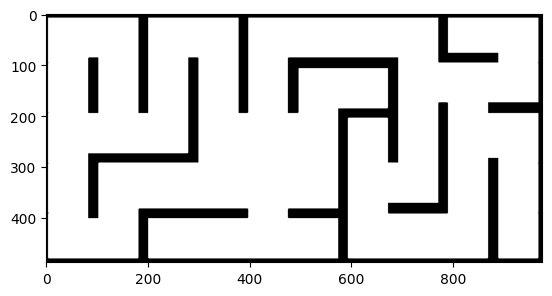

In [2]:
map = plt.imread("example_grid.png")
map = map[..., 0]
map[map>0.5] = 1
map[map<=0.5] = 0
map = 1-map.astype(np.uint8)

# map = np.zeros((5, 5), dtype=np.uint8)
# map[1, 1] = 1
# map[1, 2] = 1
# map[2, 1] = 1
# map[1, 3] = 1
# map[3, 3] = 1
# map[3, 1] = 1
# map[4, 1] = 1

plt.imshow(map, cmap='binary')
plt.show()

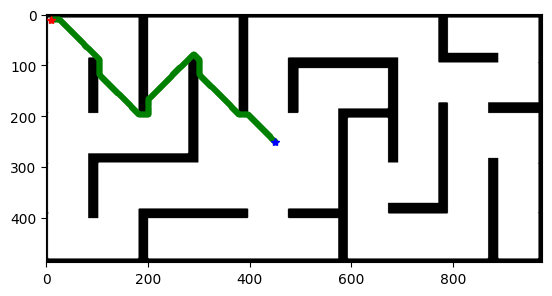

In [3]:
from dataclasses import dataclass

@dataclass(frozen=True, eq=True)
class Point:
    x: int
    y: int

def adjacent_points(p: Point, map) -> list[Point]:
    width, height = map.shape
    options = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if not (dx == 0 and dy == 0):
                if p.x+dx >= 0 and p.x+dx<width and p.y+dy >= 0 and p.y+dy < height:
                    if map.T[p.x+dx, p.y+dy] == 0:
                        options.append(Point(p.x+dx, p.y+dy))
    # assert len(options) in set((8, 3, 5))
    return options
                

def bfs(start: Point, end: Point, map: np.array):
    discovered = set()
    # [ (node, [path]), ... ]
    stack = [(start, [start])]    
    while stack:
        node, path = stack.pop(0)
        if not node in discovered:
            if node == end:
                return path
            discovered.add(node)
            for neighbor in adjacent_points(node, map):
                stack.append((neighbor, path + [neighbor]))
    return discovered

start = Point(10, 10)
end = Point(450, 250)
path = bfs(start, end, map)

plt.plot([p.x for p in path], [p.y for p in path], 'g.-')
plt.plot(start.x, start.y, 'r*')
plt.plot(end.x, end.y, 'b*')

# plt.xlim(-1, 6)
# plt.ylim(6, -1)
plt.imshow(map, cmap='binary')
plt.show()